In [47]:
# 超参数
VAULE_X = 'encode_weight_305price'
VAULE_Y = 'amount'
SIGN_LINER = 0.7 #判断是否线性相关的显著性
SIGN_PVALUE = 0.05 #判断pValue的显著性
COLS_ALL = ['date', 'amount', 'refuelLiters', 'order_cnt', 'text_day', 'text_night', 'high', 'low', 'wc_day', 'wd_day', 'wc_night', 'wd_night', 'week', 'holidays', 'encoded_wc_night', 'code_week', 'encoded_holidays', '305_price','305_order_cnt','305_amount','encode_weight_305price','313_price','313_order_cnt','313_amount' ]

import pandas as pd

# 读取excel文件并获取指定列
df = pd.read_csv('Data\结果1_全站按日期分组_2023全年.csv', usecols=COLS_ALL, encoding='GBK')
print(df.tail())


           date  order_cnt       amount  refuelLiters text_day text_night  \
359  2023-12-26    1072045  335929197.6   44738960.24        阴         多云   
360  2023-12-27    1054896  332618128.4   44334481.65       多云          晴   
361  2023-12-28    1032115  323028612.7   42986493.14        晴         多云   
362  2023-12-29    1218840  372592734.2   49432247.01       多云         小雨   
363  2023-12-30    1126207  341635923.3   45312200.19        阴          晴   

     high  low wc_day wd_day  ... code_week  holidays encoded_holidays  \
359     9    0   3~4级     东风  ...         2        平时                4   
360    12    0    <3级    西北风  ...         3        平时                4   
361    12    3   3~4级     北风  ...         4        平时                4   
362    12    5   3~4级    东南风  ...         5        平时                4   
363    14    1    <3级    西南风  ...         6        平时                4   

    305_price  encode_weight_305price 305_order_cnt   305_amount  313_price  \
359       7.5

C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


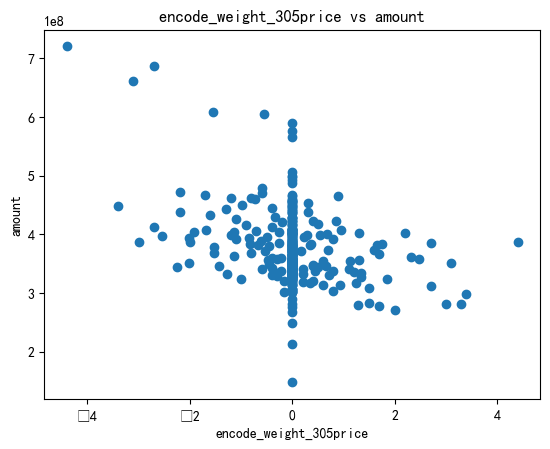

In [48]:
#画出散点图
import matplotlib.pyplot as plt

# 设置字体，确保能正确显示汉字
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体

# 绘制散点图
plt.scatter(df[VAULE_X], df[VAULE_Y])

# 添加标题和坐标轴标签
plt.title(VAULE_X+' vs '+VAULE_Y)
plt.xlabel(VAULE_X)
plt.ylabel(VAULE_Y)

# 显示图形
plt.show()

In [49]:
# 计算相关系数
corr = df[VAULE_X].corr(df[VAULE_Y])
print(corr)
# 判断线性关系强度
if corr > SIGN_LINER:
    print("具有强正向线性关系, 显著性为", corr)
elif corr < -SIGN_LINER:
    print("具有强负向线性关系, 显著性为", corr)
else:
    print("线性关系强度不足, 显著性为", corr)

-0.3849949782401653
线性关系强度不足, 显著性为 -0.3849949782401653


In [50]:
# 拟合出 两者相关性的线性 函数

# 使用最小二乘法拟合数据
column_x = df[VAULE_X]
column_y = df[VAULE_Y]
import numpy as np
coefficients = np.polyfit(column_x, column_y, 1)

# 提取斜率和截距
slope = coefficients[0]
intercept = coefficients[1]

# 打印拟合出的线性函数的参数
print("斜率:", slope)
print("截距:", intercept)


斜率: -26708137.122280724
截距: 374192453.93235


C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


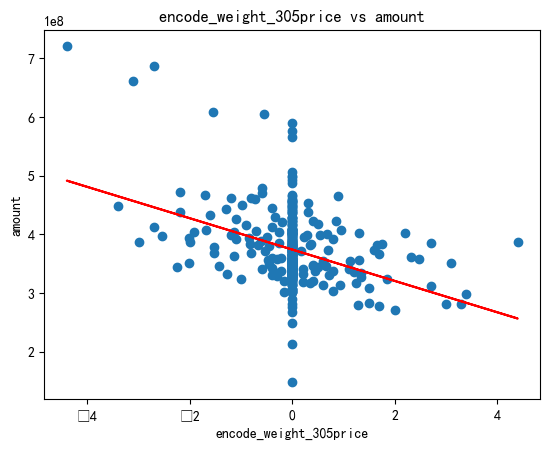

In [51]:
# 在散点图上画出来拟合回归线

# 生成拟合线的数据
x_fit = df[VAULE_X].values.reshape(-1, 1)
y_fit = slope * x_fit + intercept

# 绘制拟合线
plt.plot(x_fit, y_fit, color='red', label='拟合线')

# 绘制散点图
plt.scatter(df[VAULE_X], df[VAULE_Y])

# 添加标题和坐标轴标签
plt.title(VAULE_X+' vs '+VAULE_Y)
plt.xlabel(VAULE_X)
plt.ylabel(VAULE_Y)

# 显示图形
plt.show()